## Parsing data from keyboard log file

1. Import log_parser module
2. Call parse_keyboard_log(filepath), filepath = path to log file
3. Store result in a variable (type: Pandas DataFrame)

#### Retrieving a certain time interval from parsed data

1. Call get_segment(parsedData, index, seg_length) <br/>
    parsedData = data returned from parse_keyboard_log() <br/>
    index = which data segment to retrieve (of seg_length) <br/>
    seg_length = length of segment (time interval in seconds, default 60s) <br/>
2. Store result in a variable (type: Pandas DataFrame)

In [6]:
import log_parser

keyboard_data = log_parser.parse_keyboard_log("keyboard_actions.log")
print(keyboard_data)

# Get 5th 30s segment from data
keyboard_data_segment = log_parser.get_segment(keyboard_data, index=2, seg_length=10)
print(keyboard_data_segment)

           time  key    action   class
0        0.9152  'w'   pressed  Joseph
1        1.5871  'd'   pressed  Joseph
2        2.2754  'd'  released  Joseph
3        2.8512  'd'   pressed  Joseph
4        3.8761  'd'  released  Joseph
...         ...  ...       ...     ...
2299  1001.6193  'a'   pressed  Joseph
2300  1001.9399  'a'  released  Joseph
2301  1002.6273  'd'   pressed  Joseph
2302  1002.9156  'd'  released  Joseph
2303  1003.2193  'w'  released  Joseph

[2304 rows x 4 columns]
       time        key    action   class
11  10.2594        'd'   pressed  Joseph
12  10.6755        'd'  released  Joseph
13  10.7718        'w'  released  Joseph
14  10.9634        'a'   pressed  Joseph
15  11.2513        'w'   pressed  Joseph
16  11.5075        'a'  released  Joseph
17  15.3792        'd'   pressed  Joseph
18  15.9234        'd'  released  Joseph
19  16.8672        'a'   pressed  Joseph
20  17.0273        'a'  released  Joseph
21  18.0672        'a'   pressed  Joseph
22  18.4032    

## Parsing data from mouse log file

1. Import log_parser module
2. Call parse_mouse_log(filepath), filepath = path to log file
3. Store result in a variable (type: Pandas DataFrame)

#### Retrieving a certain time interval from parsed data

1. Call get_segment(parsedData, index, seg_length) <br/>
    parsedData = data returned from parse_keyboard_log() <br/>
    index = which data segment to retrieve (of seg_length) <br/>
    seg_length = length of segment (time interval in seconds, default 60s) <br/>
2. Store result in a variable (type: Pandas DataFrame)

In [7]:
import log_parser

mouse_data = log_parser.parse_mouse_log("mouse_actions.log")
print(mouse_data)

# Get 5th 30s segment from data
mouse_data_segment = log_parser.get_segment(mouse_data, index=5, seg_length=30)
print(mouse_data_segment)

             time     x    y button    action   class
0          0.0738 -1074  304   left  released  Joseph
1          0.5738   800  449   None      None  Joseph
2          0.5768   800  448   None      None  Joseph
3          0.5788   800  447   None      None  Joseph
4          0.5807   801  446   None      None  Joseph
...           ...   ...  ...    ...       ...     ...
312377  1003.3930   798  450   None      None  Joseph
312378  1003.4016   797  450   None      None  Joseph
312379  1003.4021   796  450   None      None  Joseph
312380  1003.4059   795  451   None      None  Joseph
312381  1003.4109   799  450   None      None  Joseph

[312382 rows x 6 columns]
           time    x    y button action   class
34886  120.0008  797  449   None   None  Joseph
34887  120.0017  796  449   None   None  Joseph
34888  120.0058  795  449   None   None  Joseph
34889  120.0098  799  450   None   None  Joseph
34890  120.0148  798  450   None   None  Joseph
...         ...  ...  ...    ...    .

## Example usage of mouse_heatmap module

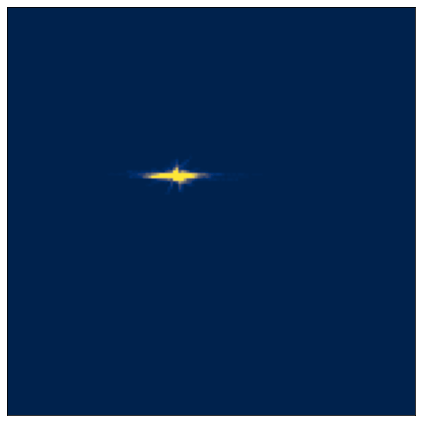

In [8]:
# Import log parser and mouse heatmap modules
import log_parser
import mouse_heatmap

# Generate the dataframe from log file
mouse_data = log_parser.parse_mouse_log("mouse_actions.log")

# Retrieve the 4th minute from the dataframe
mouse_data_segment = log_parser.get_segment(mouse_data, 4, seg_length=60)

# Use that segment to create the heatmap object
heatmap = mouse_heatmap.MouseHeatmap(mouse_data_segment)

# Show the segment as a 150x150 heatmap
heatmap.show_heatmap(res=(150, 150))

## Example usage of keyboard_heatmap module

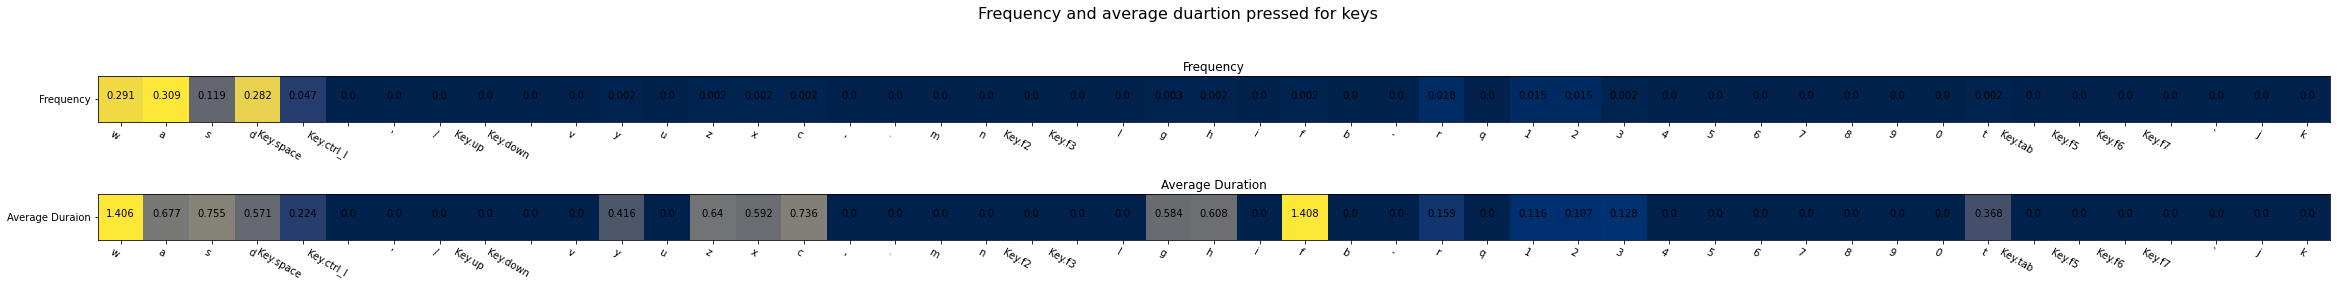

In [9]:
# Import log parser and mouse heatmap modules
import log_parser
import keyboard_heatmap

# Generate the dataframe from log file
keyboard_data = log_parser.parse_keyboard_log("keyboard_actions.log")

# Retrieve the first 10 minutes from the dataframe
keyboard_data_segment = log_parser.get_segment(keyboard_data, 1, seg_length=600)

# Use that segment to create the heatmap object
heatmap = keyboard_heatmap.KeyboardHeatmap(keyboard_data_segment)

# Show the segment as a 150x150 heatmap
heatmap.show_heatmap()